In [1]:
from fastai.vision.all import *
from fastai.metrics import *
from matplotlib import pyplot as plt

In [2]:
import os
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [3]:
conda install -c conda-forge ipywidgets

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import torch
import torchvision

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [7]:
torch.cuda.empty_cache()

In [8]:
#set path to root directory
path = Path('C:\\Users\\epi\\Desktop\\Fastai\\w_classification')

In [9]:
path.ls()

(#14) [Path('C:/Users/epi/Desktop/Fastai/w_classification/K_W_dress'),Path('C:/Users/epi/Desktop/Fastai/w_classification/K_W_jeans'),Path('C:/Users/epi/Desktop/Fastai/w_classification/K_W_pants'),Path('C:/Users/epi/Desktop/Fastai/w_classification/K_W_shirt'),Path('C:/Users/epi/Desktop/Fastai/w_classification/K_W_short'),Path('C:/Users/epi/Desktop/Fastai/w_classification/K_W_skirt'),Path('C:/Users/epi/Desktop/Fastai/w_classification/W_belt'),Path('C:/Users/epi/Desktop/Fastai/w_classification/W_dress'),Path('C:/Users/epi/Desktop/Fastai/w_classification/W_jeans'),Path('C:/Users/epi/Desktop/Fastai/w_classification/W_pants')...]

In [10]:
class_names = []
for folder_name in os.listdir(path):
    class_names.append(folder_name)

In [11]:
class_names

['K_W_dress',
 'K_W_jeans',
 'K_W_pants',
 'K_W_shirt',
 'K_W_short',
 'K_W_skirt',
 'W_belt',
 'W_dress',
 'W_jeans',
 'W_pants',
 'W_short',
 'W_shorts',
 'W_skirts',
 'W_t-shirt']

In [12]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{path}/{class_name}')
    for image_name in image_names:
        image_path = f'{path}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)

In [13]:
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)

In [14]:
df.head()

,name,label
0,C:\Users\epi\Desktop\Fastai\w_classification/K_W_dress/001_62f08692.jpg,0
1,C:\Users\epi\Desktop\Fastai\w_classification/K_W_dress/002_1c5d4556.jpg,0
2,C:\Users\epi\Desktop\Fastai\w_classification/K_W_dress/003_96f8fa5d.jpg,0
3,C:\Users\epi\Desktop\Fastai\w_classification/K_W_dress/004_5a4726df.jpg,0
4,C:\Users\epi\Desktop\Fastai\w_classification/K_W_dress/005_f501d945.jpg,0


In [15]:
df.tail()

,name,label
7193,C:\Users\epi\Desktop\Fastai\w_classification/W_t-shirt/496_845b4613.jpg,13
7194,C:\Users\epi\Desktop\Fastai\w_classification/W_t-shirt/497_1f7e985b.jpg,13
7195,C:\Users\epi\Desktop\Fastai\w_classification/W_t-shirt/498_5a9d3021.jpg,13
7196,C:\Users\epi\Desktop\Fastai\w_classification/W_t-shirt/499_ecc70c66.jpg,13
7197,C:\Users\epi\Desktop\Fastai\w_classification/W_t-shirt/500_5128dfb2.jpg,13


In [16]:
#convert into csv file
df.to_csv(
    path_or_buf=f'{path}/labels.csv',
    index=False
)

In [17]:
dls =ImageDataLoaders.from_folder(
    bs=8,  path=path,
    item_tfms=Resize(224),
#   size=224,
    num_workers=0,  
    valid_pct=0.2, seed=42)

In [18]:
dls.vocab

['K_W_dress', 'K_W_jeans', 'K_W_pants', 'K_W_shirt', 'K_W_short', 'K_W_skirt', 'W_belt', 'W_dress', 'W_jeans', 'W_pants', 'W_short', 'W_shorts', 'W_skirts', 'W_t-shirt']

In [19]:
print(dls.vocab, dls.c)

['K_W_dress', 'K_W_jeans', 'K_W_pants', 'K_W_shirt', 'K_W_short', 'K_W_skirt', 'W_belt', 'W_dress', 'W_jeans', 'W_pants', 'W_short', 'W_shorts', 'W_skirts', 'W_t-shirt'] 14


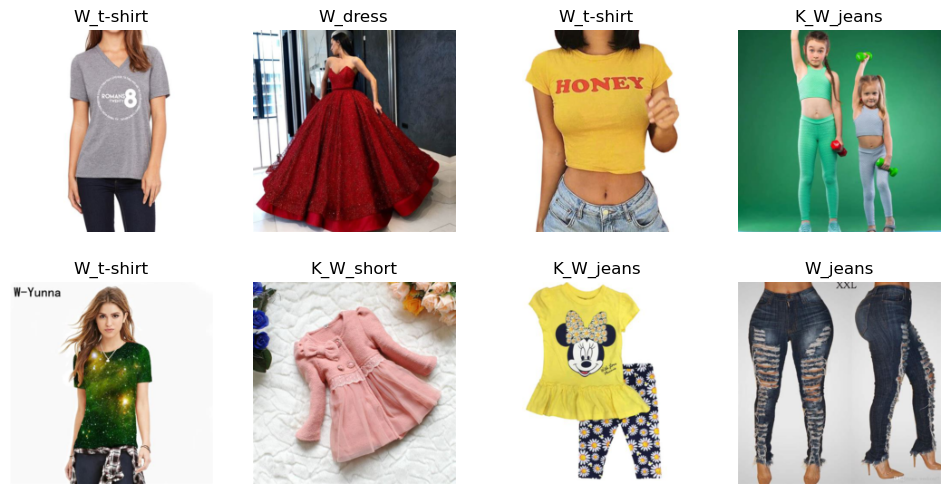

In [20]:
dls.show_batch()

In [21]:
print(len(dls.train_ds), len(dls.valid_ds))

5759 1439


In [22]:
learn = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)

In [24]:
learn.fine_tune(
    epochs=5
)

epoch,train_loss,valid_loss,accuracy,error_rate,time


KeyboardInterrupt: 

In [ ]:
learn.save('w_classification')

In [ ]:
learn.show_results()

In [ ]:
learn.export('w_classification.pkl')

In [ ]:
new_learn = load_learner(f'{path}/w_classification.pkl')

In [ ]:
new_learn.predict(
    item= 'C:\\Users\\epi\\Desktop\\C_DATASER\\C_DATASET\\men\\Creative_Style\\075_324040e8.jpg'
)